In [16]:
import pandas as pd

In [17]:
player_29 = pd.read_csv("player-6486029.csv")

In [19]:
player_29.head()

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
0,972219,6486029,647,Spring (Wave 1) 2014 Class 1,Session 1,2/11/2014,600,Player selects age,Avatar Creation,16S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,972220,6486029,647,Spring (Wave 1) 2014 Class 1,Session 1,2/11/2014,601,Player selects gender,Avatar Creation,17S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,972221,6486029,647,Spring (Wave 1) 2014 Class 1,Session 1,2/11/2014,602,Player commits to age and gender,Avatar Creation,18S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,972222,6486029,647,Spring (Wave 1) 2014 Class 1,Session 1,2/11/2014,603,Player selects avatar,Avatar Creation,21S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,972223,6486029,647,Spring (Wave 1) 2014 Class 1,Session 1,2/11/2014,604,Player commits to avatar and name,Avatar Creation,25S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# amount of time spent playing by player 29
player_29.sort_values("event_time_dbl", ascending = False).head(1)

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
17158,989377,6486029,647,Spring (Wave 1) 2014 Class 1,Session 9,3/25/2014,708,Player hits done button,Epilogue,7H 21M 23S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
logs = pd.read_csv("logs.csv")

In [22]:
logs.head()

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
0,1,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,600,Player selects age,Avatar Creation,3M 18S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,601,Player selects gender,Avatar Creation,3M 19S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,602,Player commits to age and gender,Avatar Creation,3M 25S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,603,Player selects avatar,Avatar Creation,3M 30S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,604,Player commits to avatar and name,Avatar Creation,4M 12S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
logs.shape

(2106597, 132)

In [24]:
# What's the average amount of time spent playing across all players?
average_time_played = logs.groupby(["player_id"])["event_time_dbl"].max().sum() / 166
average_time_played / 3600

55.87239959839357

In [25]:
## total of 13 stacks
# How many stacks (stories) did player-6486029 complete?
complete_stack = player_29["event_id"] == 203
sum(1 for x in complete_stack if x)

13

In [26]:
# Did player-6486029 finish the game? How many players finished the game?
# Yes, player-6486029 finished the game.
# There are 36 people that finished the game. 
finished_game = logs[logs['event_id'] == 203].groupby("player_id").size()
finished_game.value_counts()

13    32
12    17
10    17
3     13
7     12
8     11
1     10
5     10
6     10
9      9
11     8
2      7
4      6
26     1
14     1
15     1
30     1
dtype: int64

Questions:

#1 What proportion of players finished the game?

#2 What is the average amount of stacks players completed?

#3 Which players had the most playing time?

#4 Can youth behavior within games be useful for assessing attitudes concerning real-life risky behavior?

#5 How can we use the game logs to characterize, measure, and display patterns of play within the game?



In [13]:
# 36 people that finished the game and 166 players total
# Approx 22% finished the game.
36/166

0.21686746987951808

In [14]:
# About (8.5) 9 is the average, median amount of stacks completed 
finished_game.mean()

8.512048192771084

In [15]:
# top 5 players
top_players = logs.groupby(["player_id"])["event_time_dbl"].max().sort_values(ascending=False)
top_players[:5]

player_id
6607001    3032323
6607004    2610596
6486019    2184139
6626001    2167690
6567001    1807325
Name: event_time_dbl, dtype: int64

In [28]:
# how many students in each wave?
wave = logs.groupby(["wave"])["player_id"].nunique()
wave

wave
3561 (M,W) Spring 2013           5
3561 (T,TH) Spring 2013          8
3561 0647 Fall 2013              5
3561 5112 Fall 2013              8
3561 Summer 2013 - Group 1       5
3561 Summer 2013 - Group 2       3
3561 YES! Program Fall 2013      4
3561 YES! Troup                  4
Fall ( Wave 2) 2013              3
Fall (Wave 1) 2013               9
Fall (Wave 2) 2013               3
Fall 2013                        4
Single wave                     38
Spring (Wave 1) 2014 Class 1    11
Spring (Wave 2) 2014 Class 2     6
Spring 2013                     11
Spring 2014 Wave 2              14
Spring 2014 Wave 3               5
Spring 2014~ Wave 1             11
Summer 2013                      9
Name: player_id, dtype: int64

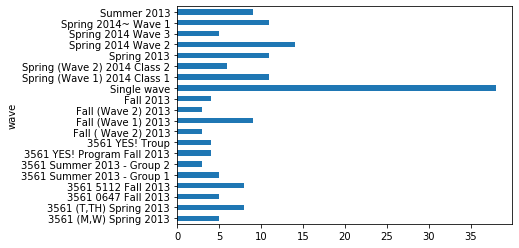

In [29]:
wave.plot.barh()

In [20]:
## compare players by:
## wave 
## average time per stack completion - students who take longer to 
## complete the stack less/more likely to finish?
## how to group the students? 
## differences within & between schools
# summary stats for each player 


In [30]:
s5_scores = pd.read_csv("S5_scores_cleaned.csv")
s5_scores.head(5)
s5_scores.shape

(240, 3)

In [31]:
finished_game_per_player = logs[logs['event_id'] == 203].groupby("player_id").size()
#finished_game_per_player

In [32]:
s5_scores_table = pd.pivot_table(s5_scores,values='S5_mean',index='player_id',columns='weeks')
s5_scores_table['average_score'] = s5_scores_table[[3 , 6, 12, 24]].mean(axis=1)

s5_scores_table

weeks,0,3,6,12,24,average_score
player_id,,,,,,
6427001.0,3.9,3.9,3.875,NaN,NaN,3.8875
6427027.0,3.8,4.0,4.000,3.8,3.6,3.8500
6427030.0,2.9,3.0,3.200,3.3,3.5,3.2500
6427032.0,4.0,3.9,4.000,3.9,3.8,3.9000
6427034.0,4.0,3.8,4.000,3.9,4.0,3.9250
...,...,...,...,...,...,...
6607007.0,4.0,4.0,4.000,4.0,4.0,4.0000
6607008.0,3.9,NaN,3.900,3.9,3.9,3.9000
6607009.0,4.0,4.0,3.900,4.0,4.0,3.9750


In [33]:
df2 = s5_scores_table.merge(finished_game_per_player.to_frame(), left_index=True, right_index=True)
# average score for S5_Scores not including Week_0

#df2
# add column for if completed 

In [34]:
# renaming columns on final dataframe
df3 = df2.rename(columns={"0_x": "Week_0", 3:"Week_3", 6:"Week_6", 12: "Week_12", 24:"Week_24",  "0_y":"Stacks_Completed"})


In [36]:
# true/false column if player completed game
df3['Game_Complete'] = df3['Stacks_Completed'].apply(lambda x: 'True' if x >= 13 else 'False')
#df3

In [37]:
# fixing decimals in columns
df3["average_score"] = df3["average_score"].round(decimals = 2)
df3["Week_6"] = df3["Week_6"].round(decimals = 2)


In [38]:
df3 = df3.reset_index()

In [39]:
df3.columns
df3["player_id"] = df3["player_id"].astype('int')

In [40]:
df3.dtypes

player_id             int32
Week_0              float64
Week_3              float64
Week_6              float64
Week_12             float64
Week_24             float64
average_score       float64
Stacks_Completed      int64
Game_Complete        object
dtype: object

In [42]:
logs["stack_id"].isnull().sum()

1816739

In [44]:
# remove duplicate rows
wave_frame = logs.iloc[:, [1,3 ]]
wave_frame = wave_frame.drop_duplicates()
wave_frame.head()


,player_id,wave
0,6427001,"3561 (T,TH) Spring 2013"
14997,6427002,"3561 (T,TH) Spring 2013"
16804,6427004,"3561 (T,TH) Spring 2013"
36596,6427005,"3561 (T,TH) Spring 2013"
38169,6427006,"3561 (T,TH) Spring 2013"


In [45]:
df4 = pd.merge(df3, wave_frame[["player_id", "wave"]], on = "player_id", how = 'left')
df4.shape

(61, 10)

In [46]:
len(pd.unique(df4["wave"]))

16

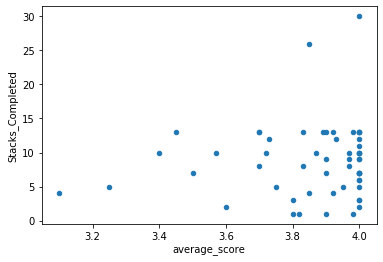

In [47]:
ax1 = df4.plot.scatter(x = "average_score", y = "Stacks_Completed")

In [48]:
# export dataframe 3 to csv
df3.to_csv("df3.csv")

In [49]:
summer = df4.loc[df4["wave"].str.contains("Summer")]
summer


,player_id,Week_0,Week_3,Week_6,Week_12,Week_24,average_score,Stacks_Completed,Game_Complete,wave
12,6430002,4.0,4.0,4.0,4.0,4.0,4.00,13,True,Summer 2013
13,6430003,4.0,4.0,3.7,NaN,NaN,3.85,26,True,Summer 2013
14,6430004,3.9,3.7,3.9,3.8,NaN,3.80,3,False,Summer 2013


In [52]:
# final table from the original 2 mill rows of data 
# final table highlights each player characteristics
stats_total = pd.read_csv(r"C:\Users\19253\Downloads\Projects\student_stats_total.csv")
stats_total.head()

,player_id,school,wave,event_time_dbl,stacks_complete,game_complete,avatar_id,avatar_gender,avatar_age,game_days,total_hours_played,game_period,avg_time_stack,season
0,6427001,3561,"3561 (T,TH) Spring 2013",37718,13,True,Hispanic,Male,13.0,11,10.48,48.0,2883.461538,spring
1,6427002,3561,"3561 (T,TH) Spring 2013",3735,2,False,African American,Female,13.0,1,1.04,1.0,1423.000000,spring
2,6427004,3561,"3561 (T,TH) Spring 2013",30307,13,True,African American,Female,13.0,9,8.42,34.0,2263.538462,spring
3,6427005,3561,"3561 (T,TH) Spring 2013",3729,1,False,Hispanic,Male,13.0,1,1.04,1.0,810.000000,spring
4,6427006,3561,"3561 (T,TH) Spring 2013",31927,13,True,African American,Female,13.0,10,8.87,50.0,2434.923077,spring
